In [2]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [3]:
#csv 파일 로드
df= pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [6]:
#conventional avocado의 가격만 예측하고자 함 (Total US에서)
#df.loc[행,열] : 인덱스 이름으로 조회하는 방법 

df= df.loc[(df.type=='conventional')&(df.region =='TotalUS')]

#date가 string으로 되어 있기 때문에 날짜형식으로 바꿔줌
df['Date']=pd.to_datetime(df['Date'])

# date 기준으로 Average price 예측하고 싶어함 + 인덱스 초기화하고 날림
data = df[['Date','AveragePrice']].reset_index(drop=True)

#칼럼의 이름을 바꿔줌
data=data.rename(columns={'Date':'ds','AveragePrice':'y'})

data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<AxesSubplot:xlabel='ds'>

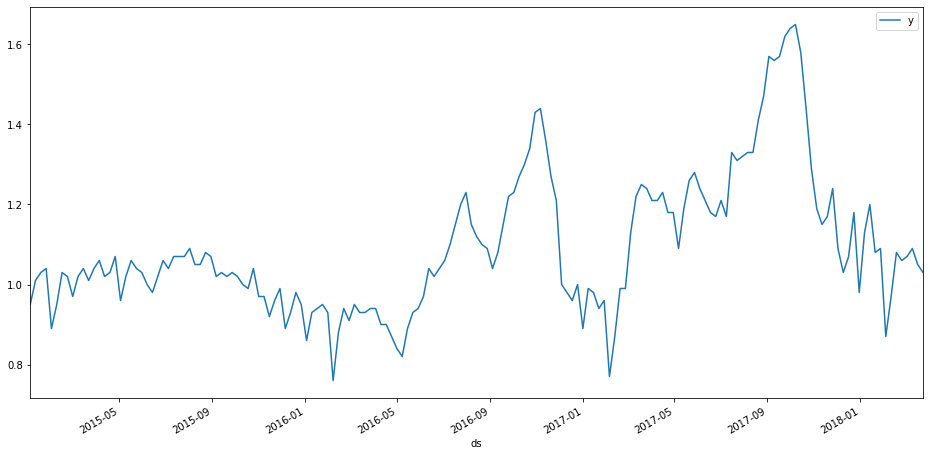

In [7]:
data.plot(x='ds',y='y',figsize=(16,8))

In [8]:
# fit 
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
# predict : 앞으로 365일 뒤를 예측하겠다 
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.160270,0.971105,1.226591,1.090177,1.229025,-0.059590,-0.059590,-0.059590,-0.059590,-0.059590,-0.059590,0.0,0.0,0.0,1.100679
530,2019-03-22,1.160137,0.974091,1.230206,1.089379,1.229347,-0.058225,-0.058225,-0.058225,-0.058225,-0.058225,-0.058225,0.0,0.0,0.0,1.101912
531,2019-03-23,1.160003,0.968873,1.228756,1.088581,1.229714,-0.056389,-0.056389,-0.056389,-0.056389,-0.056389,-0.056389,0.0,0.0,0.0,1.103614
532,2019-03-24,1.159870,0.969904,1.242516,1.087993,1.230081,-0.054099,-0.054099,-0.054099,-0.054099,-0.054099,-0.054099,0.0,0.0,0.0,1.105771
533,2019-03-25,1.159737,0.967236,1.243332,1.087523,1.230362,-0.051384,-0.051384,-0.051384,-0.051384,-0.051384,-0.051384,0.0,0.0,0.0,1.108353


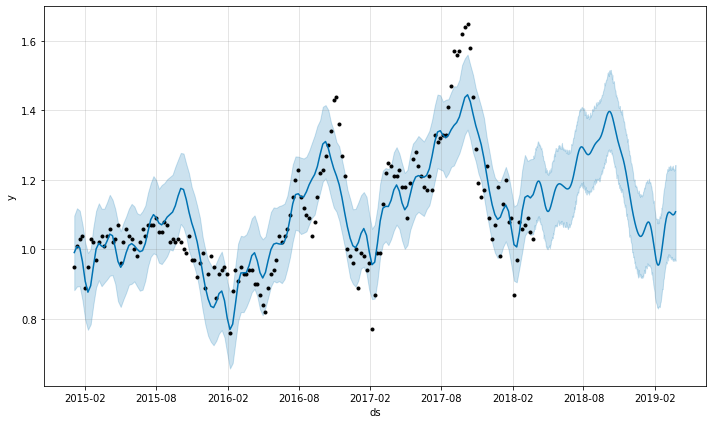

In [10]:
#plot : 점은 데이터셋의 데이터, 파란색 선은 트랜드. 
fig1 = model.plot(forecast)

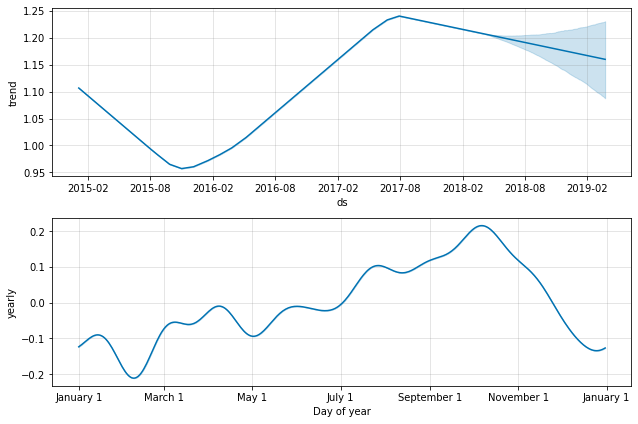

In [11]:
# 어떤 근거로 예측을 했는지 확인 (time series 데이터 예측)
fig2 = model.plot_components(forecast)